In [1]:
# Magic commands that prevent having to reload packages after I've modified them
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

The `uv_complete` package serves mainly one purpose: create co-planar arrays of antennas that sample the $uv$ plane at a high density.

The one and only class of this package is the `AntArray` class. I establish the convention that "AA" stands for "AntArray". An AntArray instance can be readily initialized without any parameters:

In [3]:
from uv_complete.antarray import AntArray

AA = AntArray()

The main attributes of an AntArray object are `AntArray.antpos` and `AntArray.commanded`. They are numpy arrays of floats, of shape $(m,2)$ and $(n,2)$ respectively, where $m$ is the number of antennas in the array, and $n$ is the number of commanded $uv$ points.

The `commanded` array is generated automatically from a series of parameters, also stored as attributes of the AntArray class. The default parameters are shown below:

In [4]:
AA = AntArray(diameter = 10, # size of the array elements, in meters; sets an upper bound on the shortest baseline
              mid_freq = 140e6, # midband frequency, in Hz; also corresponds to the "reference" frequency
              bandwidth = 20e6, # bandwidth, in Hz,
              freq_step = 0.1e6, # size of a frequency channel, in Hz,
              packing_density = 2, # number of uv points per wavelength using the reference wavelength (c/mid_freq)
              min_bl_lambda = 10, # minimum baseline length, in units of the reference wavelength
              max_bl_lambda = 100, # maximum baseline length, in units of the reference wavelength
              use_midband = True, # see below for explanation
              )

The `use_midband` parameter is a boolean that determines whether the reference frequency is the midband frequency. If set to `False`, then the "strictest" frequency/wavelength is used to make the array, i.e.:

 - the packing density is is the number of uv points per *SHORTEST* wavelength,
 - the minimum baseline length is in units of the *SHORTEST* wavelength, and
 the maximum baseline length is in units of the *LONGEST* wavelength.


In other words, if `use_midband` is set to `False`, the commanded array will be harder to fulfill, but the coverage will be more thorough. The difference will be more stark if the band is wider.

Let's quickly compare both cases, using a 100 MHz band:

In [5]:
AA_use_midband_True = AntArray(bandwidth = 100e6, use_midband = True)
AA_use_midband_False = AntArray(bandwidth = 100e6, use_midband = False)

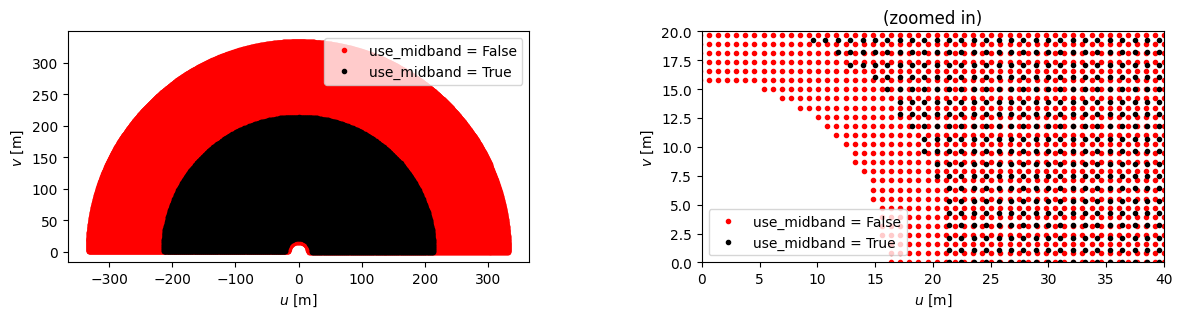

In [6]:
fig,ax = plt.subplots(1,2,figsize=[15,3])



ax[0].plot(AA_use_midband_False.commanded[:,0],AA_use_midband_False.commanded[:,1],'.',color='r',label='use_midband = False')
ax[0].plot(AA_use_midband_True.commanded[:,0],AA_use_midband_True.commanded[:,1],'.',color='k',label='use_midband = True')

ax[1].plot(AA_use_midband_False.commanded[:,0],AA_use_midband_False.commanded[:,1],'.',color='r',label='use_midband = False')
ax[1].plot(AA_use_midband_True.commanded[:,0],AA_use_midband_True.commanded[:,1],'.',color='k',label='use_midband = True')
ax[1].set_xlim([0,40])
ax[1].set_ylim([0,20])
ax[1].set_title('(zoomed in)')


for i in [0,1]:
    ax[i].set_aspect('equal')
    ax[i].legend()
    ax[i].set_xlabel(r'$u$ [m]')
    ax[i].set_ylabel(r'$v$ [m]')

Here are the other parameters that will be useful, particularly in the creation of the array, along with their default values:

In [7]:
AA = AntArray(max_array_size = None, # in meters; by default, there is no maximum to the array size
              fulfill_tolerance = 0.5, # in units of the size of the uv cells
              p_norm = np.inf, # the p-norm with which to check fulfillment of a commanded point; the infinite norm with checks that there is
                               # a baseline inside a square of side 2*fulfill_tolerance around a commanded point,
                               # but a p-norm of e.g. 2 would check that there is a baseline in a circle of radius fulfill_tolerance around
                               # the commanded point; that may be more useful if using a random set of commanded points
             )

The most interesting function of this package is the one that uses a set of "rules" (an algorithm) to generate an array based on a set of commanded points. This function is a method of the AntArray class. Here are its parameters and default values:

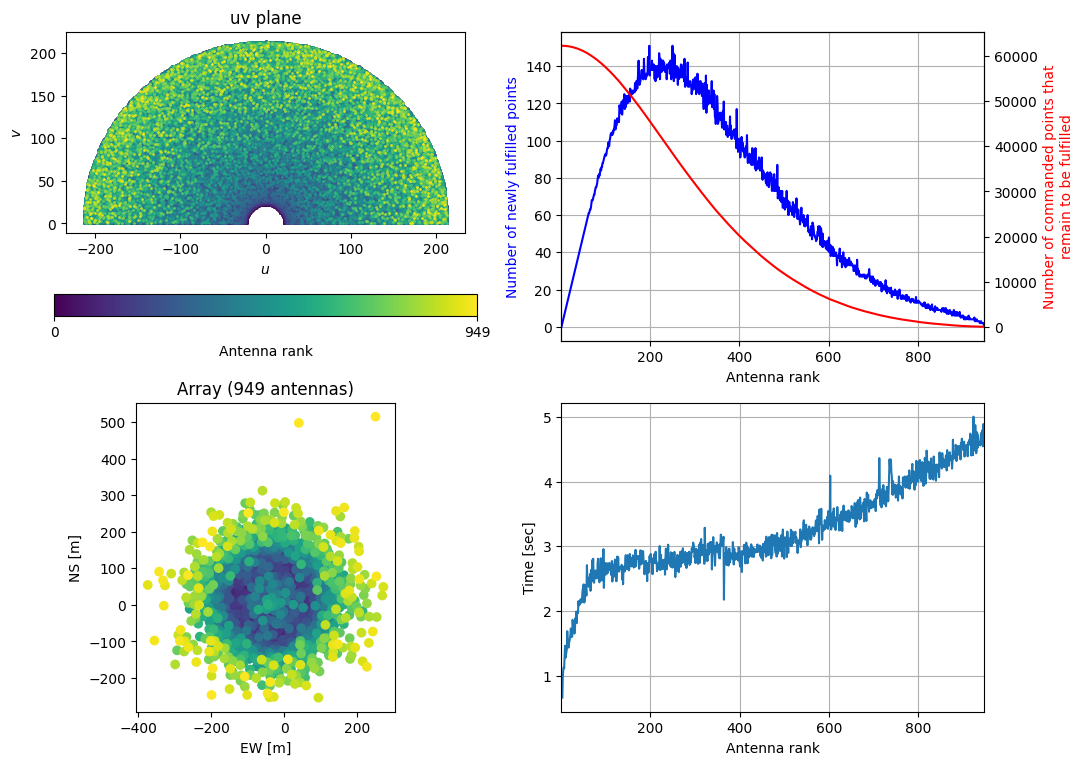

Array now has 949 antennas.
Array now spans 781.49 meters in size.
1 newly fulfilled points at last iteration.
0/62184 commanded points remain to be fulfilled after last iteration.
Number of rejected combinations after last iteration: 527370
Local time after last iteration: 22:44:16
Time for last step: 0:00:04.
Total time: 0:35:13.


In [20]:
AA.add_ant_rules(center_at_origin = True, # if True, the center of the array is fixed to be (0,0); irrelevant if max_array_size = None
                 order = 1, # -1: start with the longest baselines; 1: start with the shortest; irrelevant if compare_all_commanded = True
                 n_to_add = np.inf, # number of antennas to add; by default, will not stop until the array is completed
                 n_max_antennas = np.inf, # maximum number of antennas; only differs from n_to_add if we're picking up from a half-complete array
                 compare_all_commanded = False, # if True, will compare all possible not-yet-fulfilled commanded points before adding one; takes a long time
                 compare_all_antpos = True, # if True, will compare all referencen antennas before adding a commanded point; recommended, unless in a rush
                 save_file = True, # if True, will save the array
                 save_name = 'tutorial', # name of the saved file; defaults to a timestamp
                 verbose = True, # as usual
                 show_plot = True, # if True, will show progress in a very intuitive way; recommended if running in a notebook
                 try_continue = True, # will look for an in-progress saved file on the disk; useful for very long jobs
                 num_cores = None, # number of cores to use for parallelization; defaults to the number of cores available
                )

In [21]:
AA = AntArray(max_array_size = 500, # in meters; by default, there is no maximum to the array size
              mid_freq = 140e6,
              bandwidth = 20e6
             )

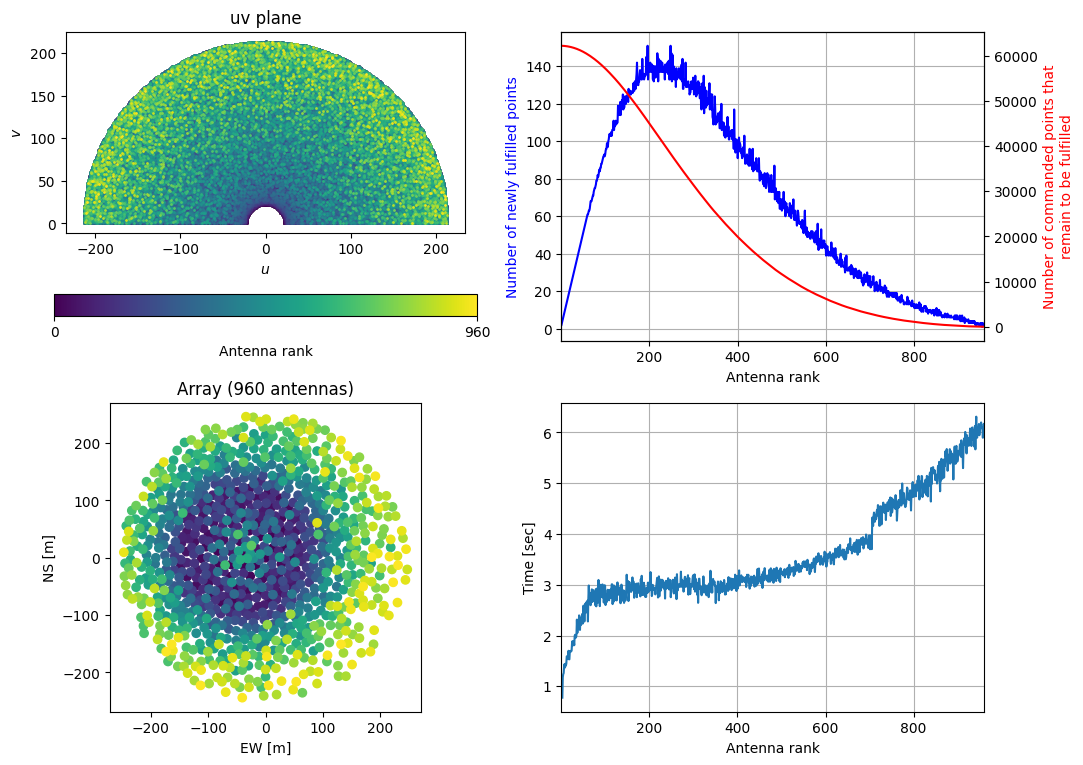

Array now has 960 antennas.
Array now spans 497.40 meters in size.
2 newly fulfilled points at last iteration.
0/62184 commanded points remain to be fulfilled after last iteration.
Number of rejected combinations after last iteration: 785309
Local time after last iteration: 11:39:50
Time for last step: 0:00:06.
Total time: 0:57:34.


In [23]:
AA.add_ant_rules(center_at_origin = True, # if True, the center of the array is fixed to be (0,0); irrelevant if max_array_size = None
                 order = 1, # -1: start with the longest baselines; 1: start with the shortest; irrelevant if compare_all_commanded = True
                 n_to_add = np.inf, # number of antennas to add; by default, will not stop until the array is completed
                 n_max_antennas = np.inf, # maximum number of antennas; only differs from n_to_add if we're picking up from a half-complete array
                 compare_all_commanded = False, # if True, will compare all possible not-yet-fulfilled commanded points before adding one; takes a long time
                 compare_all_antpos = True, # if True, will compare all referencen antennas before adding a commanded point; recommended, unless in a rush
                 save_file = True, # if True, will save the array
                 save_name = 'tutorial1', # name of the saved file; defaults to a timestamp
                 verbose = True, # as usual
                 show_plot = True, # if True, will show progress in a very intuitive way; recommended if running in a notebook
                 try_continue = True, # will look for an in-progress saved file on the disk; useful for very long jobs
                 num_cores = None, # number of cores to use for parallelization; defaults to the number of cores available
                )